In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
#Import Package


import pandas as pd #we save pandas in name of pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Load the dataset


data = pd.read_csv('../input/creditcardfraud/creditcard.csv')

Before dive in more into dataset, it's always good to take a look at the data first.

In [4]:
#Take a look at data


data.head() #call 5 first rows of data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Lets see the summary of dataset

In [5]:
data.describe().T #perform summary statistics of datasets

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
data.shape # perform number of rows and column

(284807, 31)

In [7]:
data.info() # look at any missing value of each feature, type of variable (feature)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Seem like the dataset doesn't contain any missing value.

In [8]:
#We specify fraud and normall CC from 'Class' variable

fraud = data[(data['Class'] ==1)]  #return the Class variable that has value of 1
normal = data[(data['Class'] != 1)] # return the Class variable that value except 1

labels = ['fraud','normal']

Generate a pie chart to show Fraud distribution.

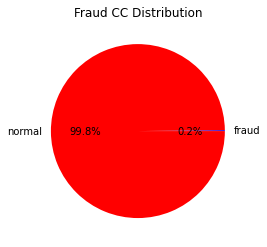

In [9]:
fig, ax = plt.subplots()
ax.pie([len(fraud),len(normal)], labels = labels, colors = ['blue','red'], autopct='%1.1f%%') #pie chart
ax.set_title('Fraud CC Distribution') #to set title
plt.show() #crucial script when u show the plot

We can see that the data is highly imbalanced. Lets take a closer look to the distribution of fraud cc

In [10]:
fraud_pct = np.round(len(fraud)/len(data)*100, 4)
fraud_pct

0.1727

Percentage of fraud cc in this dataset is 0.1727 percent.

When we look back to variable amount, this variable has large spread of value. So we scale the data as unscaled input variables can result in a slow or unstable learning process.

# DATA PREPROCESSING

In [11]:
#from the result of data.describe, the variable 'Amount' has wide spread. So we need to scale it first. 
#we can see that Amount has min value of 0, and max value of >200.000

In [12]:
from sklearn.preprocessing import StandardScaler


data['amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

#create new variable named 'amount' as result of Amount scaling with the range value of -1 until 1.
#decrease the spread value of Amount variable

**DROP VARIABLE**

In [13]:
#Next we drop unnessesary variable (Time and Amount)
#we wont use the variable of time and Amount


df = data.drop(['Time','Amount'], axis=1) # specify new dataset with the old the dataset (data),  but with variable Time and AMount dropped out.

In [14]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [15]:
#correlation between variable

corr= df.corr()

<AxesSubplot:>

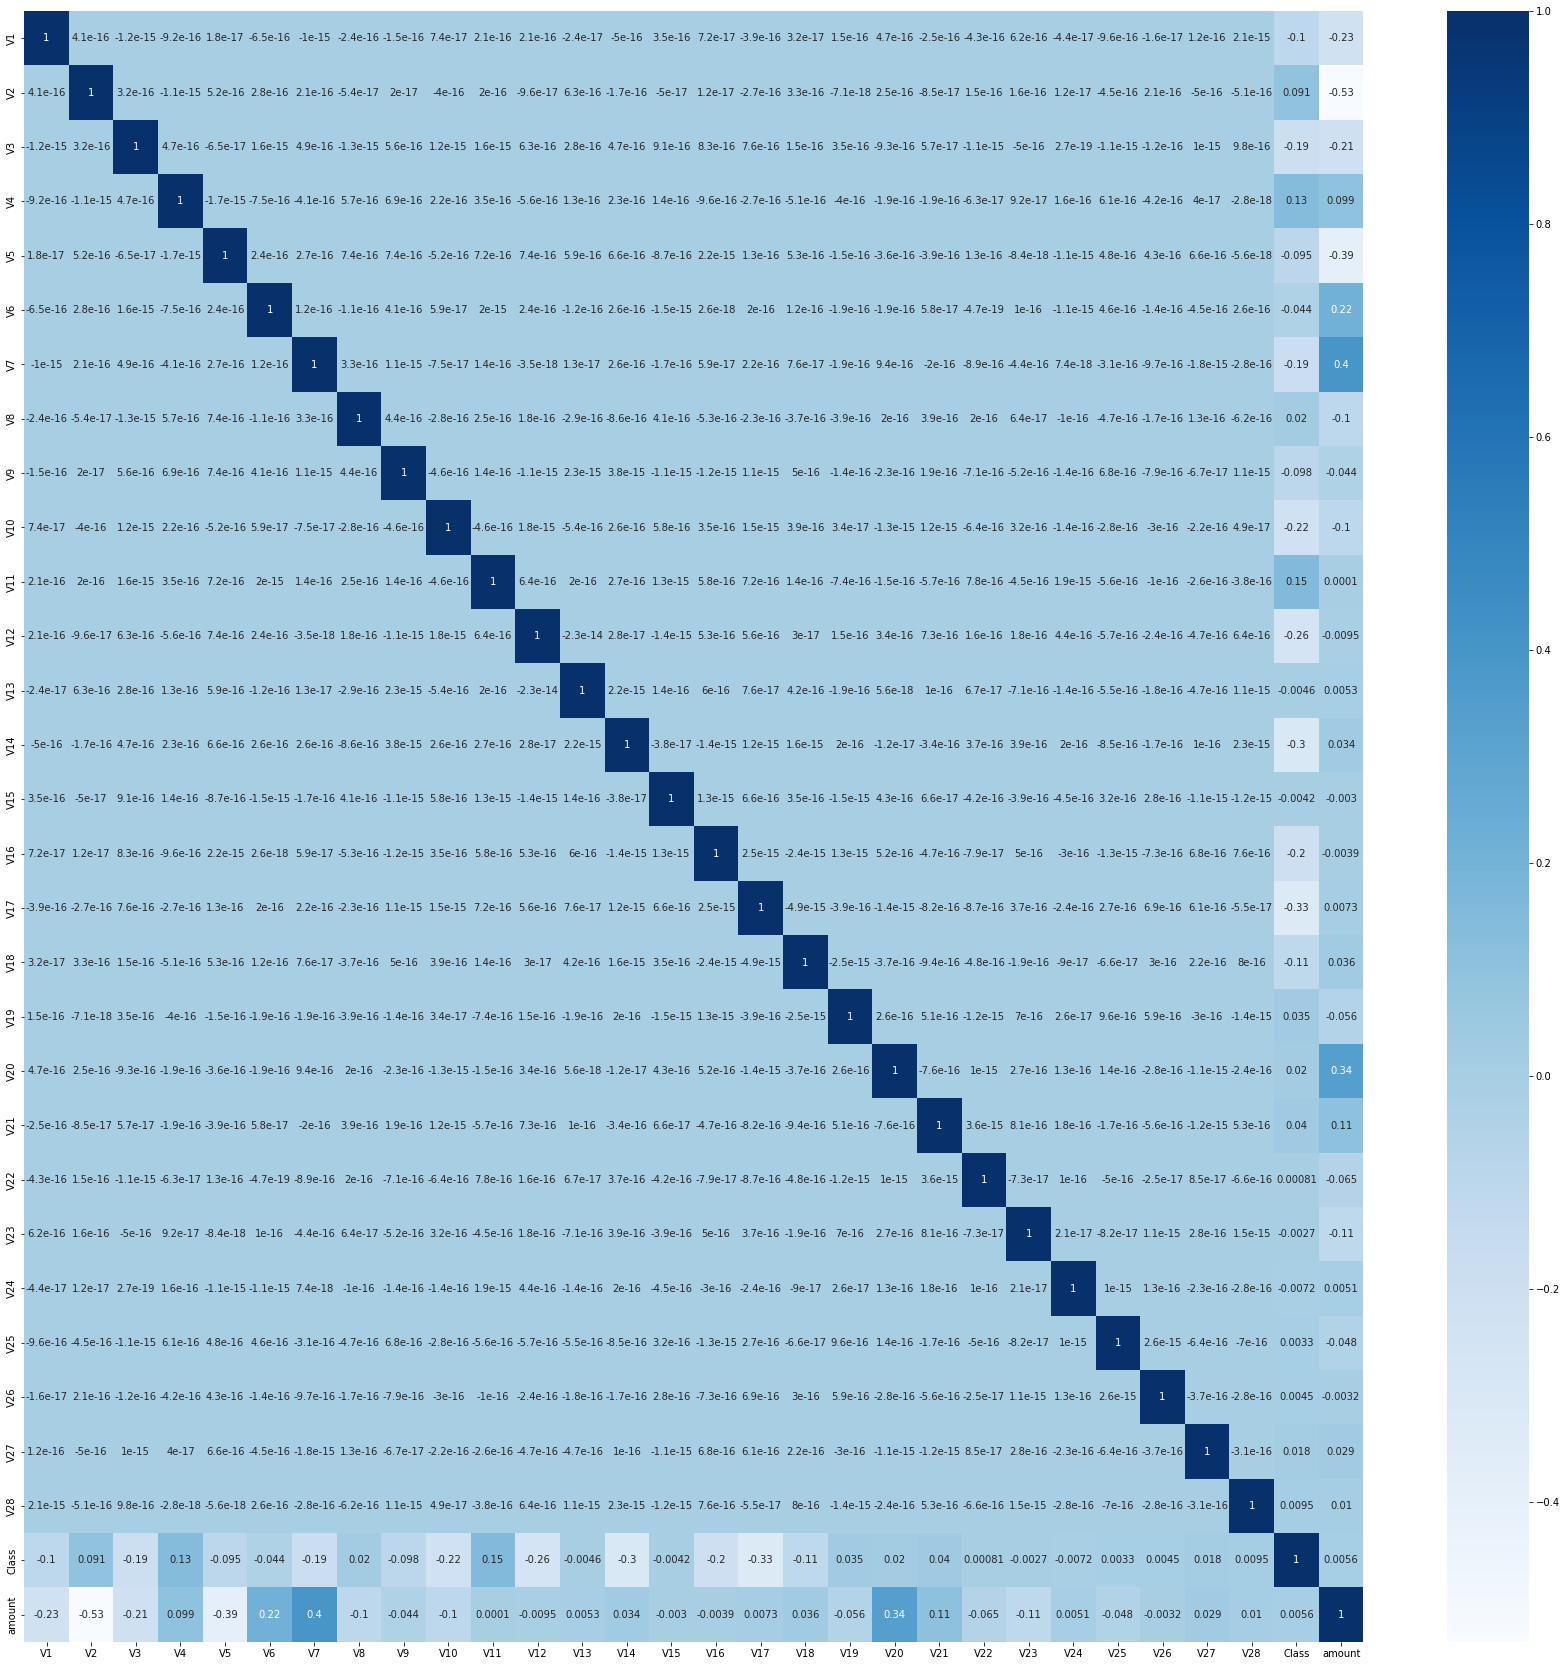

In [16]:
#show the corr matrix with seaborn library

f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corr, cmap="Blues", annot=True)

Lets look at our new dataframe

**DEFINE X AND Y**

In [17]:
y = df['Class']
X = df.drop('Class', axis=1) # X variable, dropped the Class variable

In [18]:
X.shape

(284807, 29)

In [19]:
y.shape

(284807,)

In [20]:
#As we can see the data is highly imbalanced. So we need to apply resampling method to tackle this problem. 
#we use smote techique, SMOTE is most popular resampling technique

In [21]:
#!pip install imblearn

In [22]:
from imblearn.over_sampling import SMOTE


In [23]:
smote = SMOTE(sampling_strategy ='minority') # minority is class value with small percentage.
#normal CC = majority , fraud CC = minority

X_sm, y_sm = smote.fit_resample(X, y) # New X and y variable after smote resampling

In [24]:
X_sm.shape

(568630, 29)

In [25]:
y_sm.shape

(568630,)

In [26]:
# with smote technique the number of rows increase to be 568,630 rows

In [27]:
y_sm.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

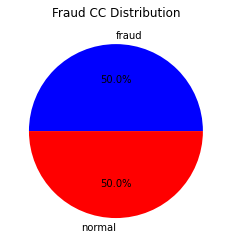

In [28]:
# look at the data distribution after resampling applied


fig, ax = plt.subplots()
ax.pie([len(y_sm==1),len(y_sm!=1)], labels = ['fraud', 'normal'], colors = ['blue','red'], autopct='%1.1f%%')
ax.set_title('Fraud CC Distribution')
plt.show()

In [29]:
#smote will pick random value between nearest neighbor of each data.
#it will make the distribution between majority and minority class equals.
#resampling technique also gonna make the evaluation score higher.

**TRAIN TEST SPLIT**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
#Set seed


seed=42
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.25, random_state = seed, stratify = y_sm)

# CATBOOST CLASSIFIER

In [32]:
#!pip install catboost

In [33]:
#import catboost

Import model solving classification task

In [34]:
from catboost import CatBoostClassifier

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
cbc = CatBoostClassifier(loss_function= 'Logloss',eval_metric = 'AUC:hints=skip_train~false', random_seed = seed)

for further details of catboost.
https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier

In [37]:
params = {
    'depth': [6,8,10],
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'l2_leaf_reg' : [0.01, 0.1, 1],
    }

In [38]:
%%time
grid = GridSearchCV(estimator=cbc, param_grid = params, cv = 3, n_jobs=-1)
grid.fit(X_train, y_train)

0:	learn: 0.9796384	total: 361ms	remaining: 17.7s
1:	learn: 0.9851838	total: 840ms	remaining: 20.2s
2:	learn: 0.9875994	total: 1.16s	remaining: 18.1s
3:	learn: 0.9898780	total: 1.46s	remaining: 16.8s
4:	learn: 0.9901454	total: 1.79s	remaining: 16.2s
5:	learn: 0.9904568	total: 2.05s	remaining: 15s
6:	learn: 0.9903088	total: 2.32s	remaining: 14.3s
7:	learn: 0.9905798	total: 2.57s	remaining: 13.5s
8:	learn: 0.9906095	total: 2.85s	remaining: 13s
9:	learn: 0.9907288	total: 3.15s	remaining: 12.6s
10:	learn: 0.9908939	total: 3.43s	remaining: 12.2s
11:	learn: 0.9911929	total: 3.71s	remaining: 11.7s
12:	learn: 0.9915007	total: 3.97s	remaining: 11.3s
13:	learn: 0.9914844	total: 4.25s	remaining: 10.9s
14:	learn: 0.9916428	total: 4.52s	remaining: 10.6s
15:	learn: 0.9919503	total: 4.8s	remaining: 10.2s
16:	learn: 0.9921404	total: 5.07s	remaining: 9.85s
17:	learn: 0.9924489	total: 5.34s	remaining: 9.5s
18:	learn: 0.9925424	total: 5.62s	remaining: 9.17s
19:	learn: 0.9925588	total: 5.9s	remaining: 8.8

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f3090ecb850>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [50, 100, 200],
                         'l2_leaf_reg': [0.01, 0.1, 1],
                         'learning_rate': [0.01, 0.1, 0.3]})

In [39]:
grid.best_estimator_

In [40]:
grid.best_score_

0.9996459322175616

In [41]:
grid.best_params_

{'depth': 10, 'iterations': 200, 'l2_leaf_reg': 0.1, 'learning_rate': 0.1}

We gonna set 'depth': 10, 'iterations': 200, 'learning_rate': 0.1, cv =3, n_jobs= -1, for hyperparamater on grid search setting.


# CatBoost Untuned

In [42]:
%%time
cbc = CatBoostClassifier(loss_function= 'Logloss',eval_metric = 'AUC:hints=skip_train~false', random_seed = seed)
cat_untuned = cbc.fit(X_train, y_train)


Learning rate set to 0.136741
0:	learn: 0.9802211	total: 187ms	remaining: 3m 6s
1:	learn: 0.9866239	total: 359ms	remaining: 2m 58s
2:	learn: 0.9902853	total: 564ms	remaining: 3m 7s
3:	learn: 0.9915440	total: 939ms	remaining: 3m 53s
4:	learn: 0.9921838	total: 1.31s	remaining: 4m 21s
5:	learn: 0.9928602	total: 1.68s	remaining: 4m 38s
6:	learn: 0.9937468	total: 1.88s	remaining: 4m 26s
7:	learn: 0.9943047	total: 2.06s	remaining: 4m 15s
8:	learn: 0.9951255	total: 2.23s	remaining: 4m 5s
9:	learn: 0.9955041	total: 2.42s	remaining: 3m 59s
10:	learn: 0.9958962	total: 2.6s	remaining: 3m 54s
11:	learn: 0.9963893	total: 2.77s	remaining: 3m 48s
12:	learn: 0.9968044	total: 2.95s	remaining: 3m 43s
13:	learn: 0.9970296	total: 3.12s	remaining: 3m 39s
14:	learn: 0.9972446	total: 3.28s	remaining: 3m 35s
15:	learn: 0.9974463	total: 3.46s	remaining: 3m 32s
16:	learn: 0.9977079	total: 3.63s	remaining: 3m 29s
17:	learn: 0.9977861	total: 3.81s	remaining: 3m 27s
18:	learn: 0.9978859	total: 3.97s	remaining: 3m 

In [43]:
from catboost import Pool
from catboost.utils import get_roc_curve

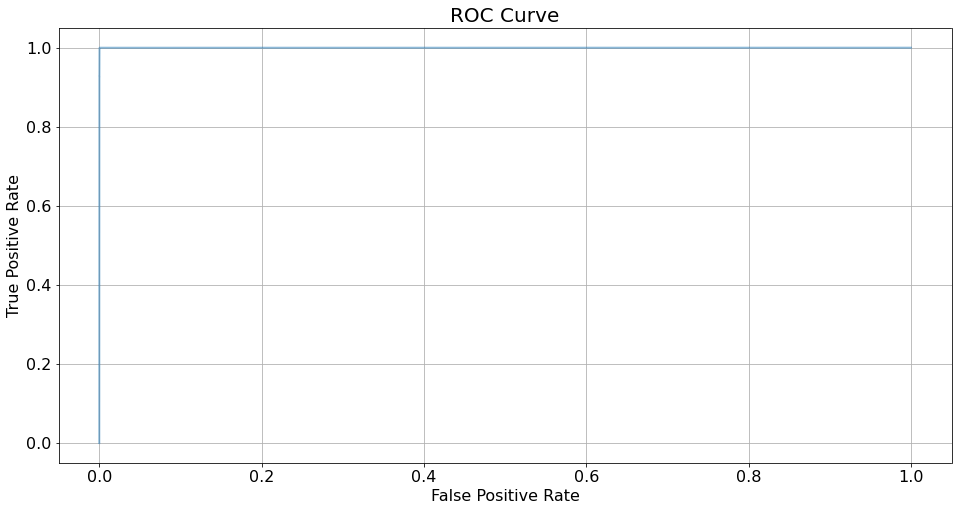

In [44]:
(fpr, tpr, thresholds) = get_roc_curve(cbc, Pool (X_test, y_test), plot=True)

In [45]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99994372, 0.99997186,
       1.        ])

In [46]:
tpr

array([0.00000000e+00, 1.40688530e-05, 2.81377059e-05, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [47]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, f1_score, confusion_matrix

In [48]:
val_data = (X_test, y_test)

In [49]:
def validate(model, val_data):
    y_pred = model.predict(val_data[0])
    print('Accuracy =', accuracy_score(y_pred, val_data[1]))
    print('ROC AUC =', roc_auc_score(y_pred, val_data[1]))
    print('F1 =', f1_score(y_pred, val_data[1]))
    print('Confusion Matrix =', confusion_matrix(y_pred, val_data[1]))

In [50]:
#y_pred1 = cbc.predict(X_test)

In [51]:
#cm1 = confusion_matrix(y_test, y_pred1)

In [52]:
#cm1

In [53]:
#Validation of Untuned CatBoost


validate(cbc, val_data)

Accuracy = 0.9993528327635448
ROC AUC = 0.999353633354381
F1 = 0.9993532422248467
Confusion Matrix = [[70988     1]
 [   91 71078]]


# CatBoost with Hyperparameter Tuning

In [54]:
%%time
cbc_tuned = CatBoostClassifier(depth = 10,
                               iterations = 200,
                               learning_rate = 0.1,
                               l2_leaf_reg = 0.01,
                               loss_function= 'Logloss',
                               eval_metric = 'AUC:hints=skip_train~false', 
                               random_seed = seed)
cbc_tuned.fit(X_train, y_train)

0:	learn: 0.9937680	total: 392ms	remaining: 1m 18s
1:	learn: 0.9972322	total: 785ms	remaining: 1m 17s
2:	learn: 0.9982381	total: 1.18s	remaining: 1m 17s
3:	learn: 0.9988059	total: 1.57s	remaining: 1m 17s
4:	learn: 0.9989730	total: 1.96s	remaining: 1m 16s
5:	learn: 0.9991693	total: 2.36s	remaining: 1m 16s
6:	learn: 0.9993915	total: 2.75s	remaining: 1m 15s
7:	learn: 0.9995406	total: 3.16s	remaining: 1m 15s
8:	learn: 0.9996225	total: 3.55s	remaining: 1m 15s
9:	learn: 0.9996726	total: 3.95s	remaining: 1m 14s
10:	learn: 0.9997036	total: 4.34s	remaining: 1m 14s
11:	learn: 0.9997364	total: 4.73s	remaining: 1m 14s
12:	learn: 0.9997538	total: 5.12s	remaining: 1m 13s
13:	learn: 0.9997669	total: 5.89s	remaining: 1m 18s
14:	learn: 0.9997903	total: 6.3s	remaining: 1m 17s
15:	learn: 0.9998072	total: 6.71s	remaining: 1m 17s
16:	learn: 0.9998269	total: 7.11s	remaining: 1m 16s
17:	learn: 0.9998420	total: 7.51s	remaining: 1m 15s
18:	learn: 0.9998535	total: 7.91s	remaining: 1m 15s
19:	learn: 0.9998691	to

Training has stopped (degenerate solution on iteration 125, probably too small l2-regularization, try to increase it)


91:	learn: 1.0000000	total: 37.6s	remaining: 44.1s
92:	learn: 1.0000000	total: 37.9s	remaining: 43.7s
93:	learn: 1.0000000	total: 38.5s	remaining: 43.4s
94:	learn: 1.0000000	total: 39.1s	remaining: 43.2s
95:	learn: 1.0000000	total: 39.4s	remaining: 42.7s
96:	learn: 1.0000000	total: 39.8s	remaining: 42.3s
97:	learn: 1.0000000	total: 40.2s	remaining: 41.9s
98:	learn: 1.0000000	total: 40.6s	remaining: 41.4s
99:	learn: 1.0000000	total: 41s	remaining: 41s
100:	learn: 1.0000000	total: 41.4s	remaining: 40.6s
101:	learn: 1.0000000	total: 41.8s	remaining: 40.1s
102:	learn: 1.0000000	total: 42.1s	remaining: 39.7s
103:	learn: 1.0000000	total: 42.5s	remaining: 39.2s
104:	learn: 1.0000000	total: 42.8s	remaining: 38.8s
105:	learn: 1.0000000	total: 43.2s	remaining: 38.3s
106:	learn: 1.0000000	total: 43.6s	remaining: 37.9s
107:	learn: 1.0000000	total: 44s	remaining: 37.5s
108:	learn: 1.0000000	total: 44.4s	remaining: 37s
109:	learn: 1.0000000	total: 44.7s	remaining: 36.6s
110:	learn: 1.0000000	total: 

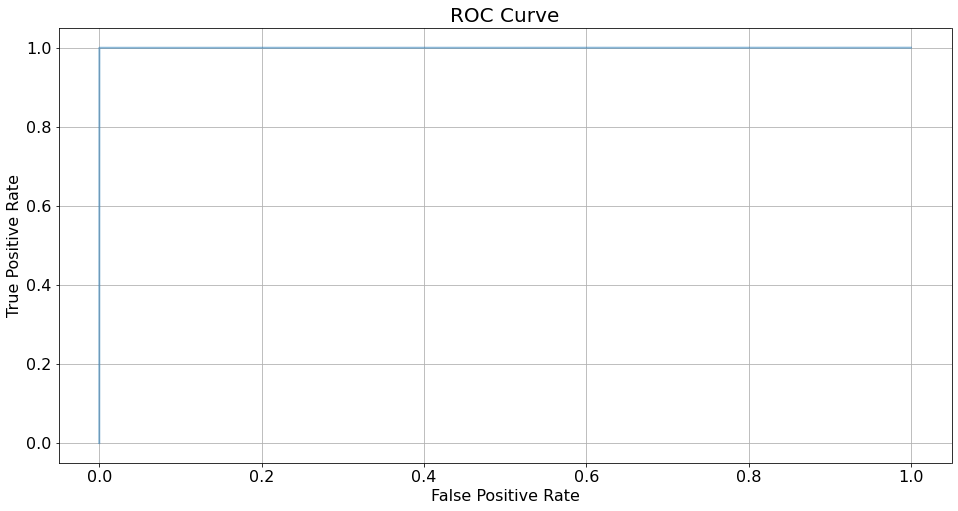

In [55]:
(fpr, tpr, thresholds) = get_roc_curve(cbc_tuned, Pool (X_test, y_test), plot=True)

In [56]:
#Validation of CatBoost with Hyperparameter Tuned
validate(cbc_tuned, val_data)

Accuracy = 0.9997397262201213
ROC AUC = 0.9997398473907747
F1 = 0.9997397902850351
Confusion Matrix = [[71043     1]
 [   36 71078]]


In [57]:
#y_pred2 = cbc_tuned.predict(X_test)

In [58]:
#cm2 = confusion_matrix(y_test, y_pred2)

In [59]:
#cm2

# XGBOOST

In [60]:
import xgboost
from xgboost import XGBClassifier

**UNTUNED XGBOOST**

In [61]:
%%time
xgb_untuned = xgboost.XGBClassifier(objective= 'binary:logistic', eval_metric = 'auc', seed= seed, use_label_encoder = False)
xgb_untuned.fit(X_train, y_train)

CPU times: user 8min 23s, sys: 868 ms, total: 8min 24s
Wall time: 4min 26s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [62]:
validate(xgb_untuned, val_data)

Accuracy = 0.9996834508082556
ROC AUC = 0.9996836336811834
F1 = 0.9996835465292088
Confusion Matrix = [[71035     1]
 [   44 71078]]


In [63]:
from sklearn.metrics import roc_curve, auc

In [64]:
#y_pred3 = xgb_untuned.predict(X_test)
#cm3 = confusion_matrix(y_test, y_pred3)
#cm3

In [65]:
#Create ROC-AUC Curve

pred = xgb_untuned.predict(val_data[0])
fpr, tpr, threshold = roc_curve(pred, val_data[1])
roc_auc = auc(fpr, tpr)

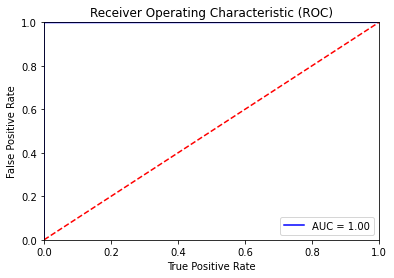

In [66]:
plt.title ('Receiver Operating Characteristic (ROC)')
plt.plot (fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc= 'lower right')
plt.plot ( [0,1], [0,1], 'r--')
plt.xlim ( [0,1])
plt.ylim ( [0,1])
plt.xlabel ( 'True Positive Rate')
plt.ylabel ( 'False Positive Rate')
plt.show()

**XGBOOST WITH HYPERPARAMETER TUNING**

In [67]:
%%time
xgb_tuned = xgboost.XGBClassifier(max_depth = 10, 
                                  n_estimators= 200, 
                                  learning_rate = 0.1, 
                                  reg_lambda = 0.01,
                                  objective= 'binary:logistic', 
                                  eval_metric = 'auc', 
                                  seed= seed, 
                                  use_label_encoder = False)
xgb_tuned.fit(X_train, y_train)

CPU times: user 24min 20s, sys: 1.89 s, total: 24min 21s
Wall time: 12min 47s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=2,
              num_parallel_tree=1, random_state=42, reg_alpha=0,
              reg_lambda=0.01, scale_pos_weight=1, seed=42, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [68]:
validate(xgb_tuned, val_data)

Accuracy = 0.9997537950730877
ROC AUC = 0.9997538901329001
F1 = 0.9997538487506067
Confusion Matrix = [[71046     2]
 [   33 71077]]


In [69]:
#y_pred4 = xgb_tuned.predict(X_test)
#cm4 = confusion_matrix(y_test, y_pred4)
#cm4

In [70]:
#Create ROC-AUC Curve
pred_ = xgb_tuned.predict(val_data[0])
fpr, tpr, threshold = roc_curve(pred_, val_data[1])
roc_auc = auc(fpr, tpr)

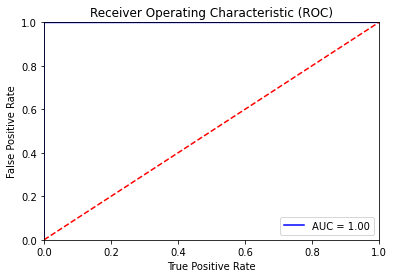

In [71]:
plt.title ('Receiver Operating Characteristic (ROC)')
plt.plot (fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc= 'lower right')
plt.plot ( [0,1], [0,1], 'r--')
plt.xlim ( [0,1])
plt.ylim ( [0,1])
plt.xlabel ( 'True Positive Rate')
plt.ylabel ( 'False Positive Rate')
plt.show()

# LIGHT GBM

In [72]:
import lightgbm
from lightgbm import LGBMClassifier

**UNTUNED LIGHT GBM**

In [73]:
%%time
lgbm_untuned = lightgbm.LGBMClassifier(objective= 'binary', metric = 'auc', seed= seed)
lgbm_untuned.fit(X_train, y_train)

CPU times: user 15.2 s, sys: 121 ms, total: 15.3 s
Wall time: 7.93 s


LGBMClassifier(metric='auc', objective='binary', seed=42)

In [74]:
validate(lgbm_untuned, val_data)

Accuracy = 0.9990644212777332
ROC AUC = 0.9990659157419294
F1 = 0.9990652300728838
Confusion Matrix = [[70951     5]
 [  128 71074]]


In [75]:
#y_pred5 = lgbm_untuned.predict(X_test)
#cm5 = confusion_matrix(y_test, y_pred5)
#cm5

In [76]:
#Create ROC-AUC Curve


pred_lgbm = lgbm_untuned.predict(val_data[0])
fpr, tpr, threshold = roc_curve(pred_lgbm, val_data[1])
roc_auc = auc(fpr, tpr)

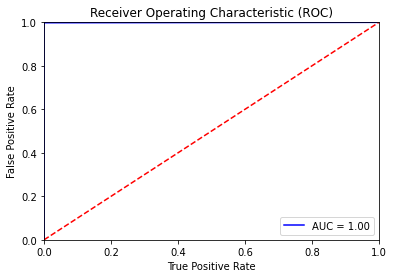

In [77]:
plt.title ('Receiver Operating Characteristic (ROC)')
plt.plot (fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc= 'lower right')
plt.plot ( [0,1], [0,1], 'r--')
plt.xlim ( [0,1])
plt.ylim ( [0,1])
plt.xlabel ( 'True Positive Rate')
plt.ylabel ( 'False Positive Rate')
plt.show()

**LIGHTGBM WITH HYPERPARAMETER TUNING**

In [78]:
%%time
lgbm_tuned = lightgbm.LGBMClassifier(max_depth = 10, 
                                     num_iterations = 200, 
                                     learning_rate = 0.1, 
                                     reg_lambda = 0.01,
                                     objective= 'binary', 
                                     metric = 'auc', 
                                     seed= seed, 
                                    )
lgbm_tuned.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


CPU times: user 27.4 s, sys: 159 ms, total: 27.6 s
Wall time: 14.7 s


LGBMClassifier(max_depth=10, metric='auc', num_iterations=200,
               objective='binary', reg_lambda=0.01, seed=42)

In [79]:
validate(lgbm_tuned, val_data)

Accuracy = 0.9996201409699067
ROC AUC = 0.9996204083716529
F1 = 0.9996202798678011
Confusion Matrix = [[71026     1]
 [   53 71078]]


In [80]:
#y_pred6 = lgbm_tuned.predict(X_test)
#cm6 = confusion_matrix(y_test, y_pred6)
#cm6

In [81]:
#Create ROC-AUC Curve


pred_lgbm_ = lgbm_tuned.predict(val_data[0])
fpr, tpr, threshold = roc_curve(pred_lgbm_, val_data[1])
roc_auc = auc(fpr, tpr)

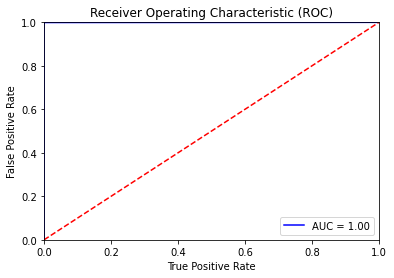

In [82]:
plt.title ('Receiver Operating Characteristic (ROC)')
plt.plot (fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc= 'lower right')
plt.plot ( [0,1], [0,1], 'r--')
plt.xlim ( [0,1])
plt.ylim ( [0,1])
plt.xlabel ( 'True Positive Rate')
plt.ylabel ( 'False Positive Rate')
plt.show()